In [62]:
from pathlib import Path

In [63]:
dir_path = Path('cropped')

In [64]:
dir_path

WindowsPath('cropped')

In [65]:
image_list = list(dir_path.glob('*/*.jpg'))

In [66]:
image_list[:5]

[WindowsPath('cropped/test/n02085620_10074.jpg'),
 WindowsPath('cropped/test/n02085620_10131.jpg'),
 WindowsPath('cropped/test/n02085620_1073.jpg'),
 WindowsPath('cropped/test/n02085620_11337.jpg'),
 WindowsPath('cropped/test/n02085620_11477.jpg')]

In [67]:
from PIL import Image
import random

In [68]:
img = Image.open(random.choice(image_list))
img.width,img.height

(224, 224)

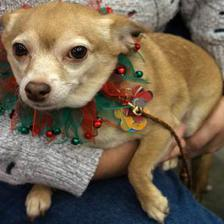

In [69]:
img

In [70]:
import numpy as np
from matplotlib import pyplot as plt

In [71]:
img = np.array(img)
img

array([[[167, 150, 143],
        [155, 140, 133],
        [117, 102,  95],
        ...,
        [142, 141, 139],
        [147, 146, 144],
        [155, 154, 152]],

       [[144, 126, 122],
        [157, 142, 135],
        [135, 122, 116],
        ...,
        [159, 158, 156],
        [163, 162, 160],
        [171, 170, 168]],

       [[118, 103, 100],
        [154, 139, 134],
        [148, 134, 131],
        ...,
        [168, 167, 165],
        [179, 178, 176],
        [191, 190, 188]],

       ...,

       [[ 11,  22,  40],
        [ 12,  23,  41],
        [ 13,  24,  42],
        ...,
        [ 46,  67,  88],
        [ 41,  59,  79],
        [ 30,  49,  66]],

       [[ 11,  22,  40],
        [ 12,  23,  41],
        [ 14,  25,  43],
        ...,
        [ 46,  67,  94],
        [ 44,  64,  88],
        [ 35,  56,  77]],

       [[ 11,  22,  40],
        [ 12,  23,  41],
        [ 13,  24,  42],
        ...,
        [ 43,  67,  95],
        [ 47,  67,  92],
        [ 38,  58,  82]]

(<matplotlib.image.AxesImage at 0x1a36d3a3850>, (224, 224, 3))

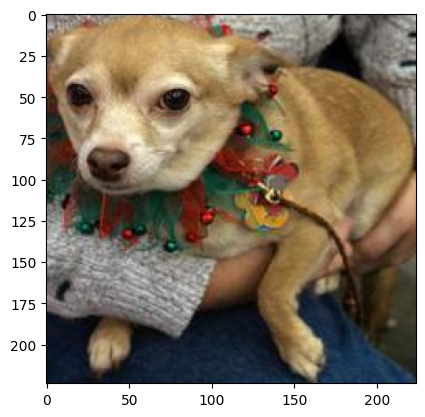

In [72]:
plt.imshow(img),img.shape

In [73]:
def plot_img(image_list:list=hotdog_image_list):
    img = Image.open(random.choice(image_list))
    print(f"height: {img.height}\nwidth :{img.width}")
    img = np.array(img)
    plt.imshow(img)   
    plt.show()

height: 224
width :224


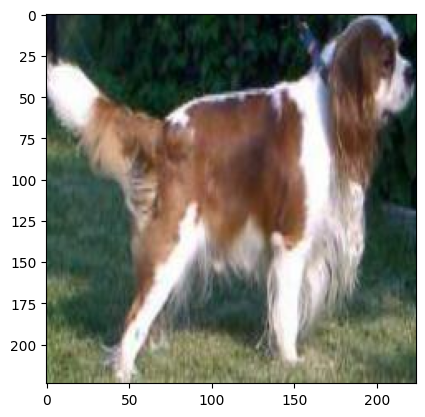

In [74]:
plot_img(image_list)

In [75]:
import torch
import torchvision
import torchvision.transforms as transforms

In [76]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.RandomHorizontalFlip(0.2),
    transforms.RandomVerticalFlip(0.2),
    transforms.RandomRotation(15),  # Rotate images by up to 15 degrees
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Mean values for each channel
                         #std=[0.229, 0.224, 0.225])
])

In [77]:
train_dir = dir_path / 'train'
test_dir = dir_path / 'test'

In [78]:
def plot_transforms(image_list:list=hotdog_image_list):
    img = Image.open(random.choice(image_list))
    transformed = train_transforms(img).permute(1,2,0)
    plt.imshow(transformed)
    

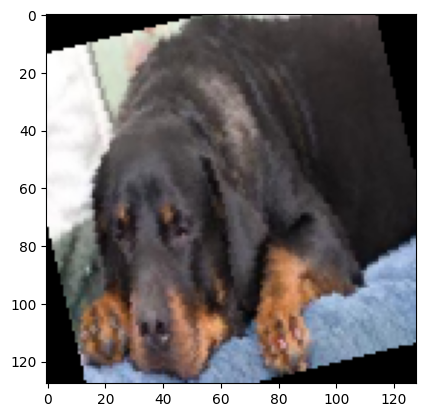

In [79]:
plot_transforms(image_list)

In [133]:
def plot_difference(image_list=image_list,transform=train_transforms):
    img = Image.open(random.choice(image_list))
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(img)
    ax[0].set_title(f'original')
    transformed = transform(img)
    ax[1].imshow(transformed.permute(1,2,0))
    ax[1].set_title(f'transformed')

In [142]:
num = int(input("enter the num of samples"))

enter the num of samples 10


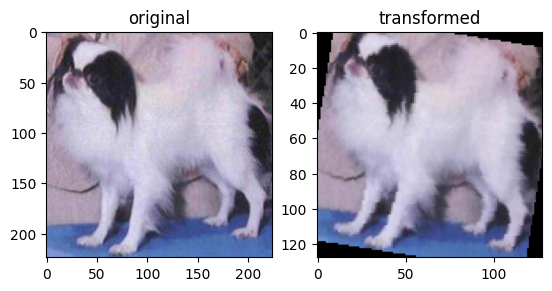

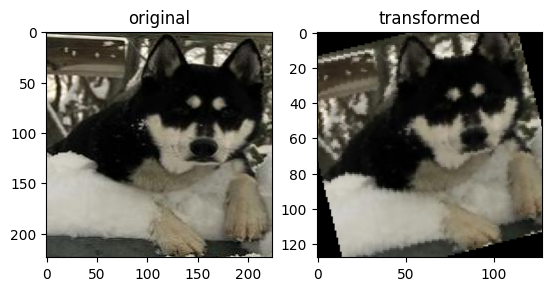

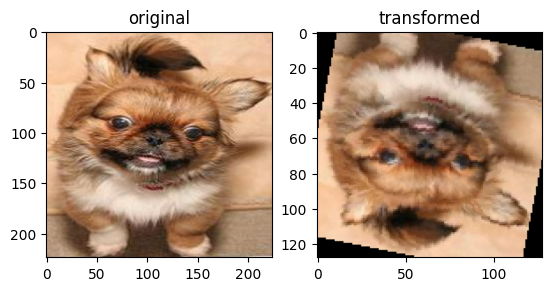

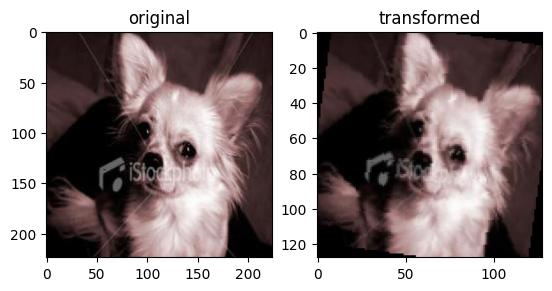

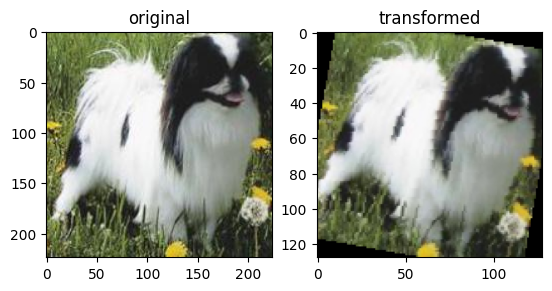

In [140]:
for i in range(num):
    plot_difference()